### Implementing Term Frequency - Inverse Document Frequency (TF-IDF) with Multinomial Naive Bayes, Random Forest, and Logistic Regression

### Exploring the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = r'C:\Users\Ayush Rajpal\OneDrive\Desktop\USC\CSCI 567 Machine Learning\Project\New Datasets\Final Datasets (combined)\CNN Dataset.csv'
df = pd.read_csv(input_file)
df.head(10)

,text,label
0,"(CNN)She's 37 and a mom, but Serena Williams ...",0
1,(CNN)One person was killed and two were injure...,1
2,(CNN)Usain Bolt has tested positive for the co...,1
3,(CNN)With another couple of swishes of that m...,0
4,(CNN)Virtually unbeatable on the clay at the F...,1
5,Story highlightsRadical Muslim cleric Abu Hamz...,0
6,Story highlightsFootball's lawmakers narrow sh...,1
7,London (CNN)Police have released images of fo...,0
8,"Story highlightsAs Farnborough 2012 kicks off,...",0
9,Story highlightsTop Brexit campaigner Boris Jo...,0


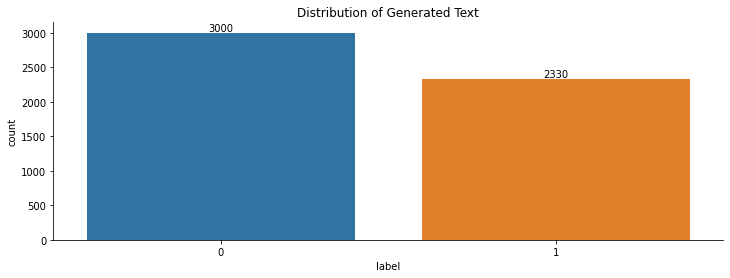

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [4]:
# Shuffling the data
shuffled_data = df.sample(frac=1, random_state=21)

In [5]:
shuffled_data.head()

,text,label
275,Story highlightsWoods returns to Masters for f...,0
3985,Story highlightsOne person has been dug out al...,0
3442,"(CNN)Cardinal Donald Wuerl, the embattled arch...",1
622,Story highlightsFernando Alonso leads drivers'...,0
5127,Story highlightsSame-sex married couples are b...,0


### Implementation of TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_data["text"])
Y = shuffled_data["label"]

In [8]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=10)

In [9]:
np.size(y_train)

3997

In [10]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 768
Number of 1s: 565


### Multinomial NaiveBayes Classifier

In [11]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

In [13]:
counts = np.bincount(y_pred)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 1313
Number of 1s: 20


In [14]:
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 59.11%
Precision: 100.00%
Recall: 3.54%
F1 Score: 6.84%


### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 79.59%
Precision: 77.90%
Recall: 72.39%
F1 Score: 75.05%


In [17]:
# Changing the number of tree and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100 

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 88.75%
Precision: 85.23%
Recall: 88.85%
F1 Score: 87.00%


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [20]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100 

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 85.15%
Precision: 90.33%
Recall: 72.74%
F1 Score: 80.59%
